In [2]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

filename = "C:\\Users\\simon\\OneDrive\\Escritorio\\Coding_dojp\\Datos\\Europe Hotel Booking Satisfaction Score.csv"

df = pd.read_csv(filename)

In [3]:
#Row deletion

df = df.drop(columns = ["id", "Other service"])#"Id" column removed for not influencing the target
                                               #Column "service" removed for nnot knowing what kind of service

In [4]:
#Evaluate "Type of booking" column 
#There is data "Not defined"

filtro = df["Type Of Booking"] == 'Not defined'
df_filtro = df.loc[filtro, :]

df_filtro

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,neutral or dissatisfied
11,Female,12,tourism,Personal Travel,Not defined,2,4,2,2,1,1,1,5,1,neutral or dissatisfied
27,Female,49,business,Group Travel,Not defined,4,4,4,4,2,1,4,2,2,satisfied
37,Male,40,personal,Personal Travel,Not defined,4,3,4,2,2,2,2,3,2,neutral or dissatisfied
69,Female,38,personal,Group Travel,Not defined,4,4,4,4,4,4,4,1,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103811,Male,27,personal,Group Travel,Not defined,4,4,4,4,4,4,4,3,4,neutral or dissatisfied
103867,Male,30,personal,Group Travel,Not defined,3,2,2,2,3,3,3,2,3,neutral or dissatisfied
103868,Female,57,personal,Personal Travel,Not defined,1,5,1,5,4,3,5,1,1,neutral or dissatisfied
103877,Male,27,tourism,Group Travel,Not defined,5,4,4,4,5,5,5,2,5,satisfied


In [5]:
#Display the filtered column 

print(df["Type Of Booking"].value_counts())
print(df["Type Of Booking"].value_counts(normalize= True))

#Reprecents 7.2 % of the Df
#We will remove the all the rows filtered. Is less  than 10%

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64


In [6]:
#Deletion of rows
filas_eliminadas = df.index[df["Type Of Booking"] == "Not defined"].tolist()
df = df.drop(filas_eliminadas)
df = df.reset_index(drop = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96410 entries, 0 to 96409
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          96410 non-null  object
 1   Age                             96410 non-null  int64 
 2   purpose_of_travel               96410 non-null  object
 3   Type of Travel                  96410 non-null  object
 4   Type Of Booking                 96410 non-null  object
 5   Hotel wifi service              96410 non-null  int64 
 6   Departure/Arrival  convenience  96410 non-null  int64 
 7   Ease of Online booking          96410 non-null  int64 
 8   Hotel location                  96410 non-null  int64 
 9   Food and drink                  96410 non-null  int64 
 10  Stay comfort                    96410 non-null  int64 
 11  Common Room entertainment       96410 non-null  int64 
 12  Checkin/Checkout service        96410 non-null

In [7]:
df_2 = df #New Df clean

In [8]:
#Categorical change of teh target column "satisfaction"

print(df_2["satisfaction"].value_counts())
print(df_2["satisfaction"].value_counts(normalize=True))


#Variable object "Satisfied"
#label 1 satisfaction
#label 2 neutral or dissatisfied

cambio = {"neutral or dissatisfied" : 0,
         "satisfied": 1}

df_2["satisfaction"] = df_2["satisfaction"].map(cambio)



neutral or dissatisfied    53229
satisfied                  43181
Name: satisfaction, dtype: int64
neutral or dissatisfied    0.552111
satisfied                  0.447889
Name: satisfaction, dtype: float64


In [9]:
#Change of Categorical columns
#"Gender", "purpose_of_travel", "Type of Travel" and "Type Of Booking"


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_2["Gender"] = le.fit_transform(df["Gender"])
df_2["purpose_of_travel"] = le.fit_transform(df["purpose_of_travel"])
df_2["Type of Travel"] = le.fit_transform(df["Type of Travel"])
df_2["Type Of Booking"] = le.fit_transform(df["Type Of Booking"])

In [20]:
df_2

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction,cluster
0,1,25,4,0,0,3,2,3,3,1,1,1,1,1,0,0
1,0,26,4,0,0,2,2,2,2,5,5,5,4,5,1,1
2,0,25,4,0,0,2,5,5,5,2,2,2,1,2,0,0
3,1,61,1,0,0,3,3,3,3,4,5,3,3,3,1,1
4,0,26,2,1,1,3,4,2,1,1,1,1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96405,0,23,2,0,1,2,1,2,3,2,2,2,2,2,0,0
96406,1,49,4,0,0,4,4,4,4,2,5,5,5,4,1,1
96407,1,30,4,0,0,1,1,1,3,4,5,4,5,4,0,1
96408,0,22,2,0,1,1,1,1,5,1,1,1,5,1,0,0


In [11]:
#Escalar los datos para evitar sesgo de datos

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_2)#fit y transfor 

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

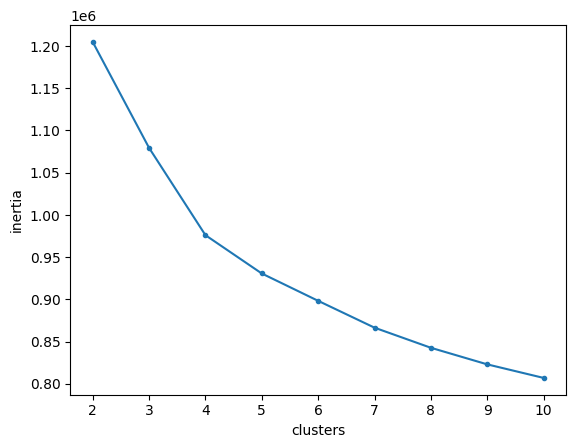

In [12]:
#Crear una lista para inercia
inertias = []
#loop atravez de los valores k entre 2 y 10, luego los guarda en la lista inertia.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters');
plt.ylabel('inertia');

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

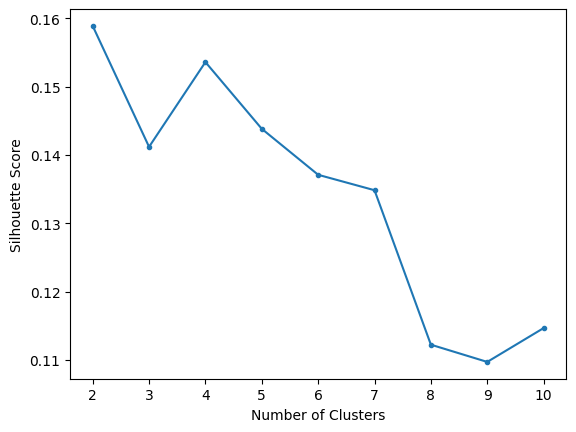

In [13]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [15]:
#Creamos el modelo Kmeans con cluster de 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_df)
# Agregamos los cluster al df
df_2['cluster'] = kmeans.labels_
df_2.head()

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction,cluster
0,1,25,4,0,0,3,2,3,3,1,1,1,1,1,0,0
1,0,26,4,0,0,2,2,2,2,5,5,5,4,5,1,1
2,0,25,4,0,0,2,5,5,5,2,2,2,1,2,0,0
3,1,61,1,0,0,3,3,3,3,4,5,3,3,3,1,1
4,0,26,2,1,1,3,4,2,1,1,1,1,4,1,0,0


In [17]:
# Agrupamos el df por cluster y por sus promedios
# agregamos el as_index = False para que el cluster sea una columna
cluster_groups = df_2.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,0,0.479963,37.200485,2.054898,0.463394,0.700576,2.376264,3.081803,2.567841,2.958248,2.388209,2.524276,2.352623,2.967746,2.350515,0.113944
1,1,0.505814,41.322210,2.046355,0.156831,0.302857,3.022374,3.019621,2.930008,2.993938,3.900214,4.248107,4.237532,3.629370,4.098199,0.729634


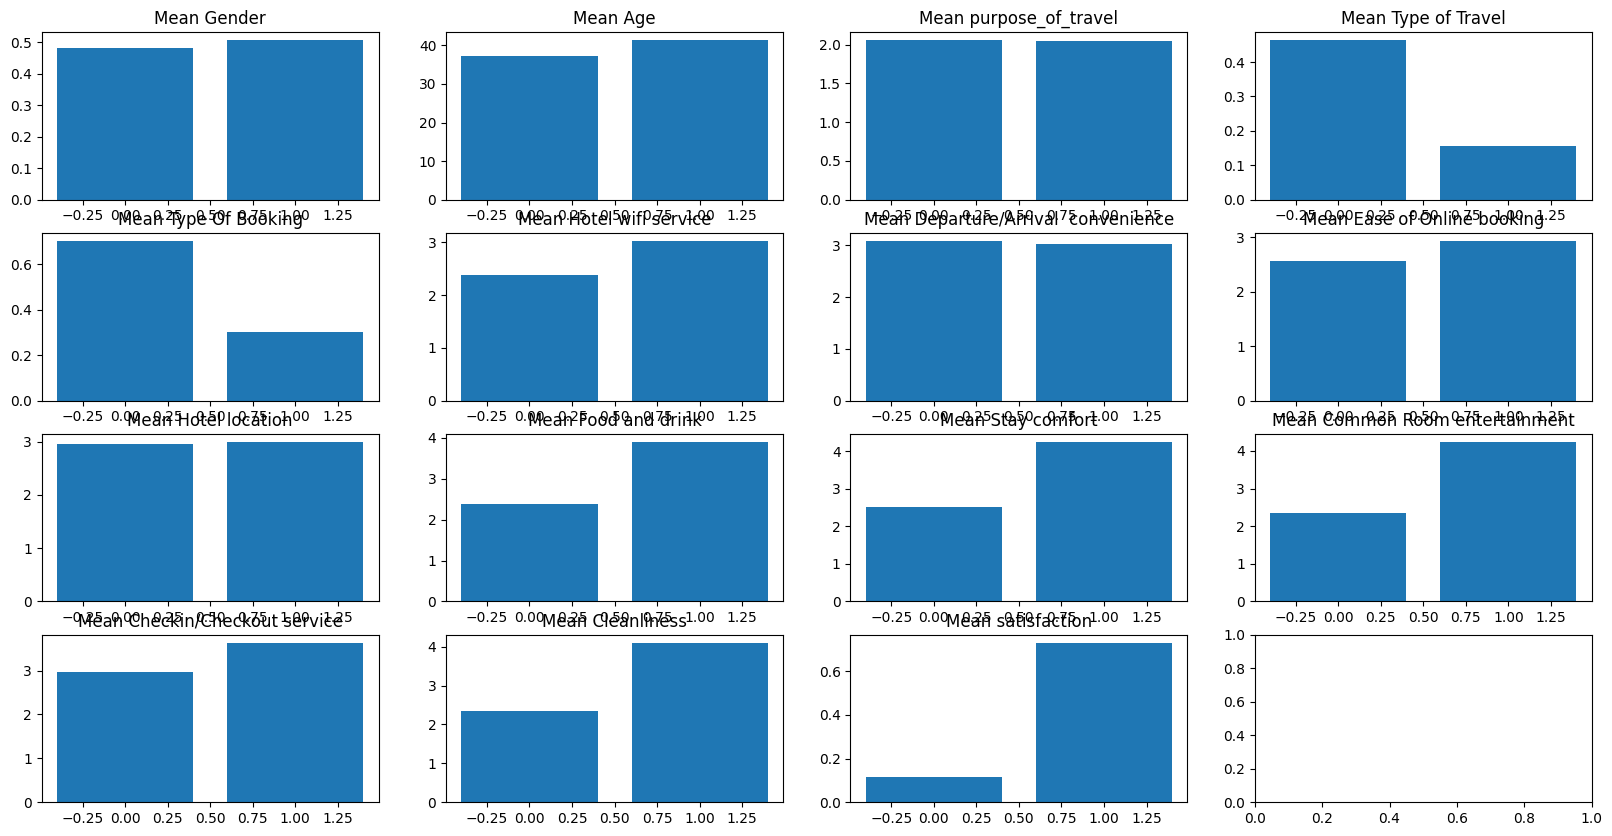

In [19]:
# Visualizar los promedios
fig, axes = plt.subplots(4,4, figsize = (20, 10))
#axes.ravel() will flatten it to 12,1
axes = axes.ravel()
#Itera sobre las columnas y plotea cada una en base a su promedio
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')